In [2]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [3]:
N, S, E, I, R, D, t, k = smp.symbols('N S E I R D t k')
N*S*E*I*R*D*t*k

D*E*I*N*R*S*k*t

In [6]:
beta, omega, rho, delta, epsilon, tau, gamma, f_s = smp.symbols ('beta omega rho delta epsilon tau gamma f_s', positive=True)

dSdt = omega * N - epsilon * f_s * (1-tau) * I * S / N - rho * S * N/k
dEdt = epsilon * f_s * I * (1-tau) * S / N - (1-0.5*tau) * beta * E - rho * E * N/k
dIdt = (1-0.5*tau) * beta * E - delta * I - gamma * I - rho * I * N/k
dRdt = gamma * I - rho * R * N/k

equations = smp.Matrix([dSdt, dEdt, dIdt, dRdt])
equations

Matrix([
[             -I*S*epsilon*f_s*(1 - tau)/N - N*S*rho/k + N*omega],
[-E*N*rho/k - E*beta*(1 - 0.5*tau) + I*S*epsilon*f_s*(1 - tau)/N],
[           E*beta*(1 - 0.5*tau) - I*N*rho/k - I*delta - I*gamma],
[                                            I*gamma - N*R*rho/k]])

In [5]:
# New infections equations
F1 = epsilon * f_s * (1-tau) * I * S / N #E
F2 = 0 #I
F3 = 0 #R

new_infections = smp.Matrix([F1, F2, F3])
new_infections

Matrix([
[I*S*epsilon*f_s*(1 - tau)/N],
[                          0],
[                          0]])

In [6]:
# flow transitions equations - Other movements between compartments
V1 = (1-0.5*tau) * beta * E + rho * E * N/k
V2 = (1-0.5*tau) * -beta * E + delta * I + gamma * I + rho * I * N/k
V3 = -gamma * I + rho * R * N/k

flow_transitions = smp.Matrix([V1, V2, V3])
flow_transitions

Matrix([
[                     E*N*rho/k + E*beta*(1 - 0.5*tau)],
[-E*beta*(1 - 0.5*tau) + I*N*rho/k + I*delta + I*gamma],
[                                 -I*gamma + N*R*rho/k]])

In [7]:
dfe = smp.Matrix([N,0,0,0])
dfe

Matrix([
[N],
[0],
[0],
[0]])

In [8]:
new_infections_jacobian = new_infections.jacobian([E, I, R])
new_infections_jacobian

Matrix([
[0, S*epsilon*f_s*(1 - tau)/N, 0],
[0,                         0, 0],
[0,                         0, 0]])

In [9]:
F = new_infections_jacobian.subs({S:dfe[0], E:dfe[1], I:dfe[2], R:dfe[3]})
F

Matrix([
[0, epsilon*f_s*(1 - tau), 0],
[0,                     0, 0],
[0,                     0, 0]])

In [10]:
flow_transitions_jacobian = flow_transitions.jacobian([E, I, R])
flow_transitions_jacobian

Matrix([
[N*rho/k + beta*(1 - 0.5*tau),                       0,       0],
[         -beta*(1 - 0.5*tau), N*rho/k + delta + gamma,       0],
[                           0,                  -gamma, N*rho/k]])

In [11]:
V = flow_transitions_jacobian.subs({S:dfe[0], E:dfe[1], I:dfe[2], R:dfe[3]})
V

Matrix([
[N*rho/k + beta*(1 - 0.5*tau),                       0,       0],
[         -beta*(1 - 0.5*tau), N*rho/k + delta + gamma,       0],
[                           0,                  -gamma, N*rho/k]])

In [12]:
V.inv()

Matrix([
[                                                                                                                                                                                                                                                   -1.0*k/(-1.0*N*rho + 0.5*beta*k*tau - 1.0*beta*k),                                                                        0,             0],
[                                                            (0.5*beta*k**2*tau - 1.0*beta*k**2)/(-1.0*N**2*rho**2 + 0.5*N*beta*k*rho*tau - 1.0*N*beta*k*rho - 1.0*N*delta*k*rho - 1.0*N*gamma*k*rho + 0.5*beta*delta*k**2*tau - 1.0*beta*delta*k**2 + 0.5*beta*gamma*k**2*tau - 1.0*beta*gamma*k**2),                            0.5*k/(0.5*N*rho + 0.5*delta*k + 0.5*gamma*k),             0],
[(0.5*beta*gamma*k**3*tau - 1.0*beta*gamma*k**3)/(-1.0*N**3*rho**3 + 0.5*N**2*beta*k*rho**2*tau - 1.0*N**2*beta*k*rho**2 - 1.0*N**2*delta*k*rho**2 - 1.0*N**2*gamma*k*rho**2 + 0.5*N*beta*delta*k**2*rho*tau - 1.0*N*beta*del

In [13]:
K = F*(V.inv())
K

Matrix([
[epsilon*f_s*(1 - tau)*(0.5*beta*k**2*tau - 1.0*beta*k**2)/(-1.0*N**2*rho**2 + 0.5*N*beta*k*rho*tau - 1.0*N*beta*k*rho - 1.0*N*delta*k*rho - 1.0*N*gamma*k*rho + 0.5*beta*delta*k**2*tau - 1.0*beta*delta*k**2 + 0.5*beta*gamma*k**2*tau - 1.0*beta*gamma*k**2), 0.5*epsilon*f_s*k*(1 - tau)/(0.5*N*rho + 0.5*delta*k + 0.5*gamma*k), 0],
[                                                                                                                                                                                                                                                             0,                                                                   0, 0],
[                                                                                                                                                                                                                                                             0,                                                                   0, 0]])

In [14]:
eigenvalues=K.eigenvals()
r0 = None
for eigenvalue, multiplicity in eigenvalues.items():
    if smp.simplify(eigenvalue) != 0: 
        r0 = eigenvalue
        break  
        
r0=r0.simplify()
r0
#thank you Greg Cousins for this code I still dont understand what an eigenvalue is

1.0*beta*epsilon*f_s*k**2*(0.5*tau - 1.0)*(tau - 1)/((N*rho + delta*k + gamma*k)*(1.0*N*rho - 0.5*beta*k*tau + 1.0*beta*k))

In [15]:
t = np.linspace(0,365,365)
def fs(t):
    return ((2 * (-1671.74227799228 * np.sin(98 * np.pi / 365) / np.pi ** 2 - 1285.9555984556 * np.sin(154 * np.pi / 365) / np.pi ** 2 - 514.382239382239 * np.sin(182 * np.pi / 365) / np.pi ** 2 - 514.382239382239 * np.sin(168 * np.pi / 365) / np.pi ** 2 - 257.19111969112 * np.sin(141 * np.pi / 365) / np.pi ** 2 - 257.19111969112 * np.sin(84 * np.pi / 365) / np.pi ** 2 - 128.59555984556 * np.sin(14 * np.pi / 73) / np.pi ** 2 - 1.70530256582424e-13 * np.cos(112 * np.pi / 365) / np.pi - 1.13686837721616e-13 * np.cos(28 * np.pi / 73) / np.pi - 1.4210854715202e-14 * np.cos(84 * np.pi / 365) / np.pi - 5.6843418860808e-14 * np.cos(168 * np.pi / 365) / np.pi - 1.4210854715202e-14 * np.cos(182 * np.pi / 365) / np.pi + 3.5527136788005e-15 * np.cos(14 * np.pi / 73) / np.pi + 2.8421709430404e-14 * np.cos(126 * np.pi / 365) / np.pi + 1.13686837721616e-13 * np.cos(154 * np.pi / 365) / np.pi + 1.84741111297626e-13 * np.cos(98 * np.pi / 365) / np.pi + 128.59555984556 * np.sin(31 * np.pi / 73) / np.pi ** 2 + 514.382239382239 * np.sin(112 * np.pi / 365) / np.pi ** 2 + 900.168918918919 * np.sin(126 * np.pi / 365) / np.pi ** 2 + 3086.29343629344 * np.sin(28 * np.pi / 73) / np.pi ** 2) * np.sin(2 * np.pi * t / 365) / 365 + 2 * (-1671.74227799228 * np.cos(98 * np.pi / 365) / np.pi ** 2 - 1285.9555984556 * np.cos(154 * np.pi / 365) / np.pi ** 2 - 257.19111969112 * np.cos(84 * np.pi / 365) / np.pi ** 2 - 128.59555984556 * np.cos(14 * np.pi / 73) / np.pi ** 2 - 514.382239382239 * np.cos(168 * np.pi / 365) / np.pi ** 2 - 128.59555984556 * np.cos(31 * np.pi / 73) / np.pi ** 2 - 514.382239382239 * np.cos(182 * np.pi / 365) / np.pi ** 2 - 1.84741111297626e-13 * np.sin(98 * np.pi / 365) / np.pi - 1.13686837721616e-13 * np.sin(154 * np.pi / 365) / np.pi - 2.8421709430404e-14 * np.sin(126 * np.pi / 365) / np.pi - 3.5527136788005e-15 * np.sin(14 * np.pi / 73) / np.pi + 1.4210854715202e-14 * np.sin(84 * np.pi / 365) / np.pi + 1.4210854715202e-14 * np.sin(182 * np.pi / 365) / np.pi + 5.6843418860808e-14 * np.sin(168 * np.pi / 365) / np.pi + 1.13686837721616e-13 * np.sin(28 * np.pi / 73) / np.pi + 1.70530256582424e-13 * np.sin(112 * np.pi / 365) / np.pi + 257.19111969112 * np.cos(141 * np.pi / 365) / np.pi ** 2 + 514.382239382239 * np.cos(112 * np.pi / 365) / np.pi ** 2 + 900.168918918919 * np.cos(126 * np.pi / 365) / np.pi ** 2 + 3086.29343629344 * np.cos(28 * np.pi / 73) / np.pi ** 2) * np.cos(2 * np.pi * t / 365) / 365) + 0.167382450944095)/0.35
    
def R0(t, beta, epsilon, fs, tau, rho, delta, gamma, k, N):
    return ((beta * epsilon *  fs(t) * k**2 * (1-tau)*(0.5*tau-1))/((beta * k + N*rho + beta * k * 0.5 * tau - 2 * beta * k)*(k * delta + k * gamma + N * rho)))

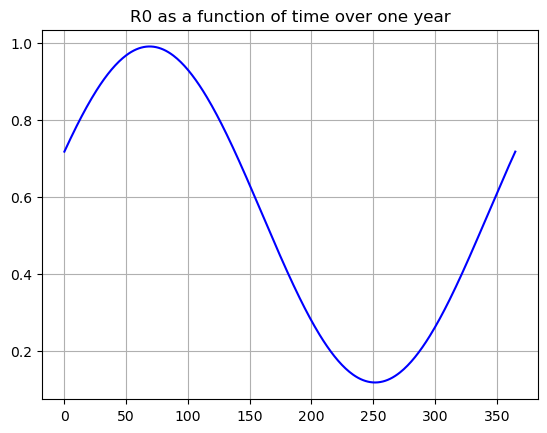

In [57]:
#Actual calculation
beta = 0.0164  # Rate of infection from exposure (becoming infectious after being exposed) / day
gamma = 0.000001  # Rate of recovery / day
delta = 0.0021  # Morality rate / day
epsilon = 0.02  # Rate of exposure / day
omega = 0.00164  # Per capita population growth rate birthrate / day
rho = omega  # Per capita normal death rate (not including disease) / day
tau = 0.82
k = 53000 # Carrying capacity
t = np.linspace(0,365,365) # time span on which we are testing, here it is one year
N = 53000 #initial population
plt.plot(t, R0(t, beta, epsilon, fs, tau, rho, delta, gamma, k, N), 'b')
plt.title('R0 as a function of time over one year')
plt.grid()
plt.show()

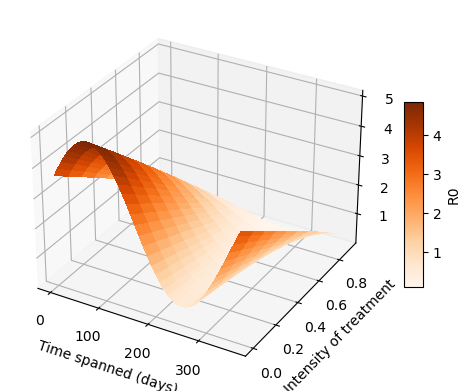

In [17]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data
t = np.arange(0, 365, 1)
Tau = np.arange(0, 1, 0.1)
t, Tau = np.meshgrid(t, Tau)
Z = R0(t,beta, epsilon, fs, Tau, rho, delta, gamma, k, N)
# Plot the surface.

surf = ax.plot_surface(t, Tau, Z, cmap=cm.Oranges,linewidth=0, antialiased=False, label = 'R0 of time and treatment surface')#creating the surface from the current, distance spanned and watts lost
#code for plotting
fig.colorbar(surf, shrink=0.5, aspect=10, label= 'R0') #Colour bar to make the z-axis clear
ax.set_xlabel('Time spanned (days)   ,')
ax.set_ylabel('Intensity of treatment')
ax.set_zlabel('R0')
ax.set_zlabel('R0')
plt.show()

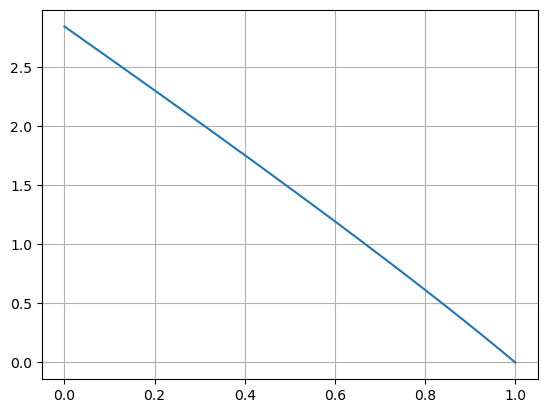

0.6684931506849315


In [52]:
def average_R0(R0, beta, epsilon, fs, Tau, rho, delta, gamma, k, N, n):
    t = np.linspace(n,n)
    sum = 0
    for i in range (0, 365):
        sum = sum+R0(i, beta, epsilon, fs, Tau, rho, delta, gamma, k, N)
    return sum/n
Tau = np.linspace(0,1,365)
plt.plot(Tau, average_R0(R0, beta, epsilon, fs, Tau, rho, delta, gamma, k, N, 365))
plt.grid()
plt.show()
for i in range (0, 365):
    if average_R0(R0, beta, epsilon, fs, Tau[i], rho, delta, gamma, k, N, 365)<=1:
        print(i/365)
        break